In [1]:
import matplotlib.pyplot as plt
import numpy as np

from model_classes import InfoAccessEnum
from run_model import run_model, graph_model

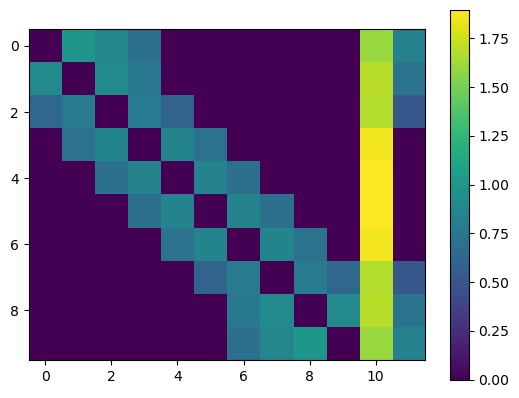

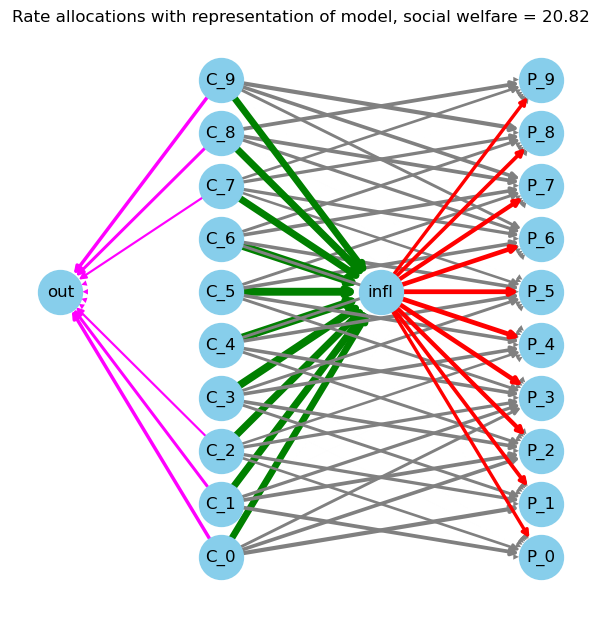

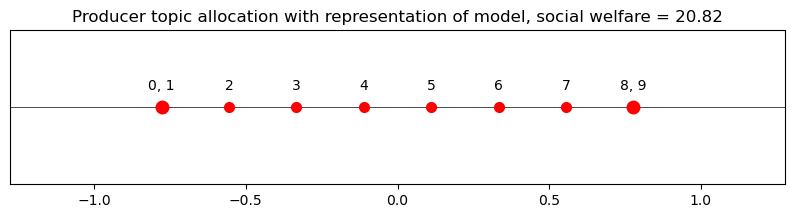

In [2]:
model = run_model()

plt.imshow(model.mems_alloc, cmap='viridis', interpolation='none')
plt.colorbar()  # Show a colorbar to map color intensity to the data value
plt.savefig('paper/figures/2D_perfect.jpg')
plt.show()

graph_model(model, f'representation of model', file=f'default')

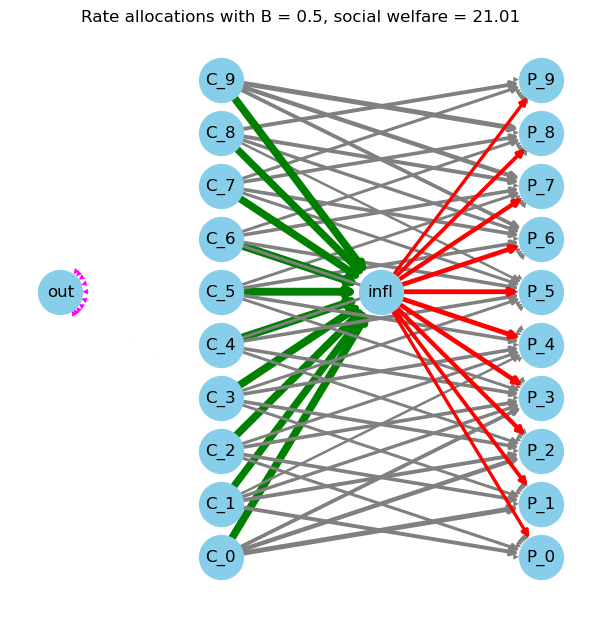

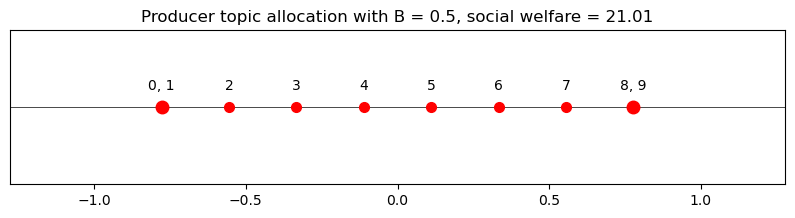

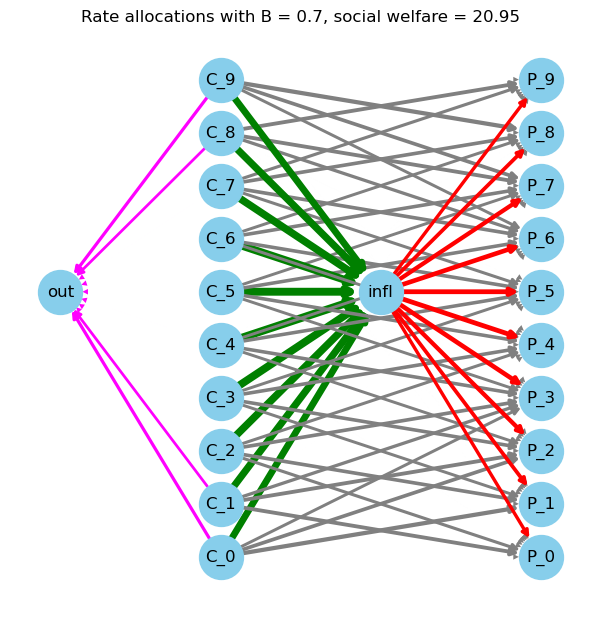

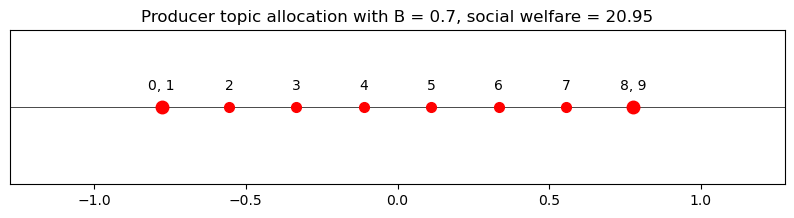

Did not converge!


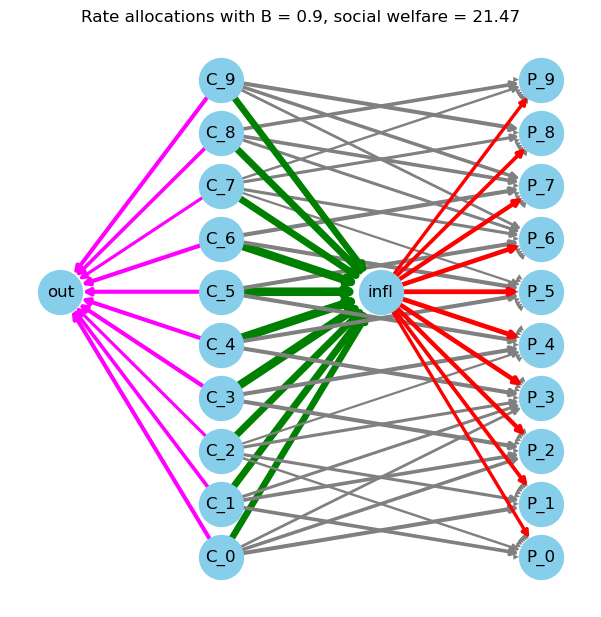

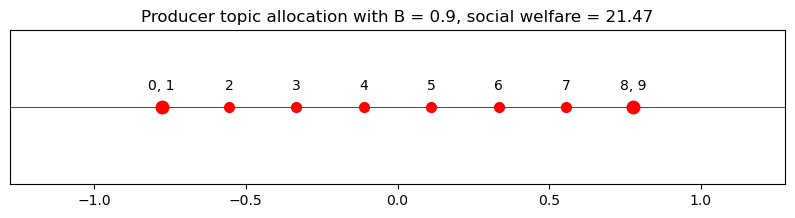

In [3]:
for B in [0.5, 0.7, 0.9]:
    model = run_model(
        B_0=B,
    )

    graph_model(model, f'B = {B}', file=f'B_0/{B}')

Did not converge!


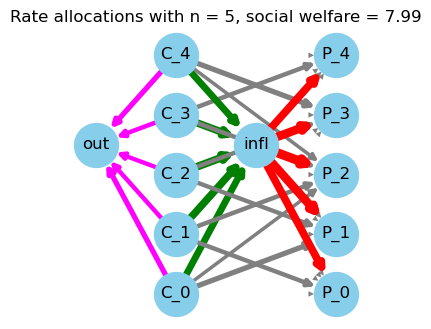

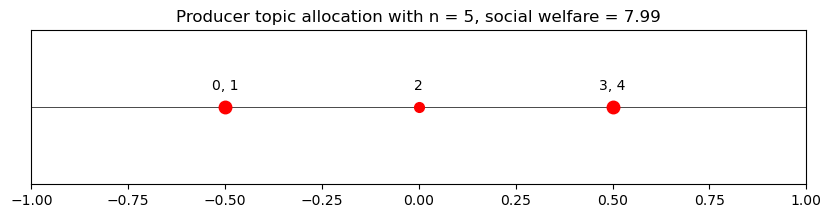

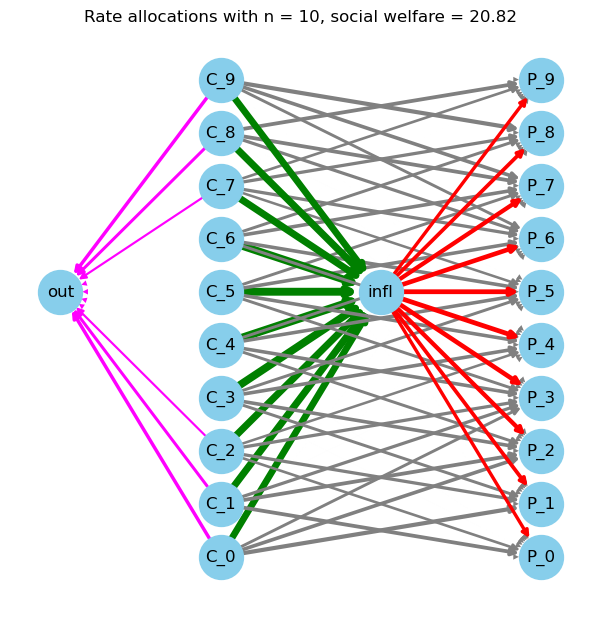

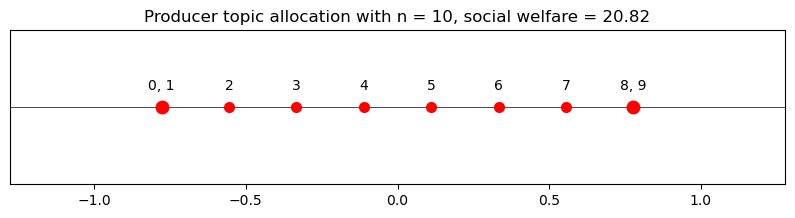

Did not converge!


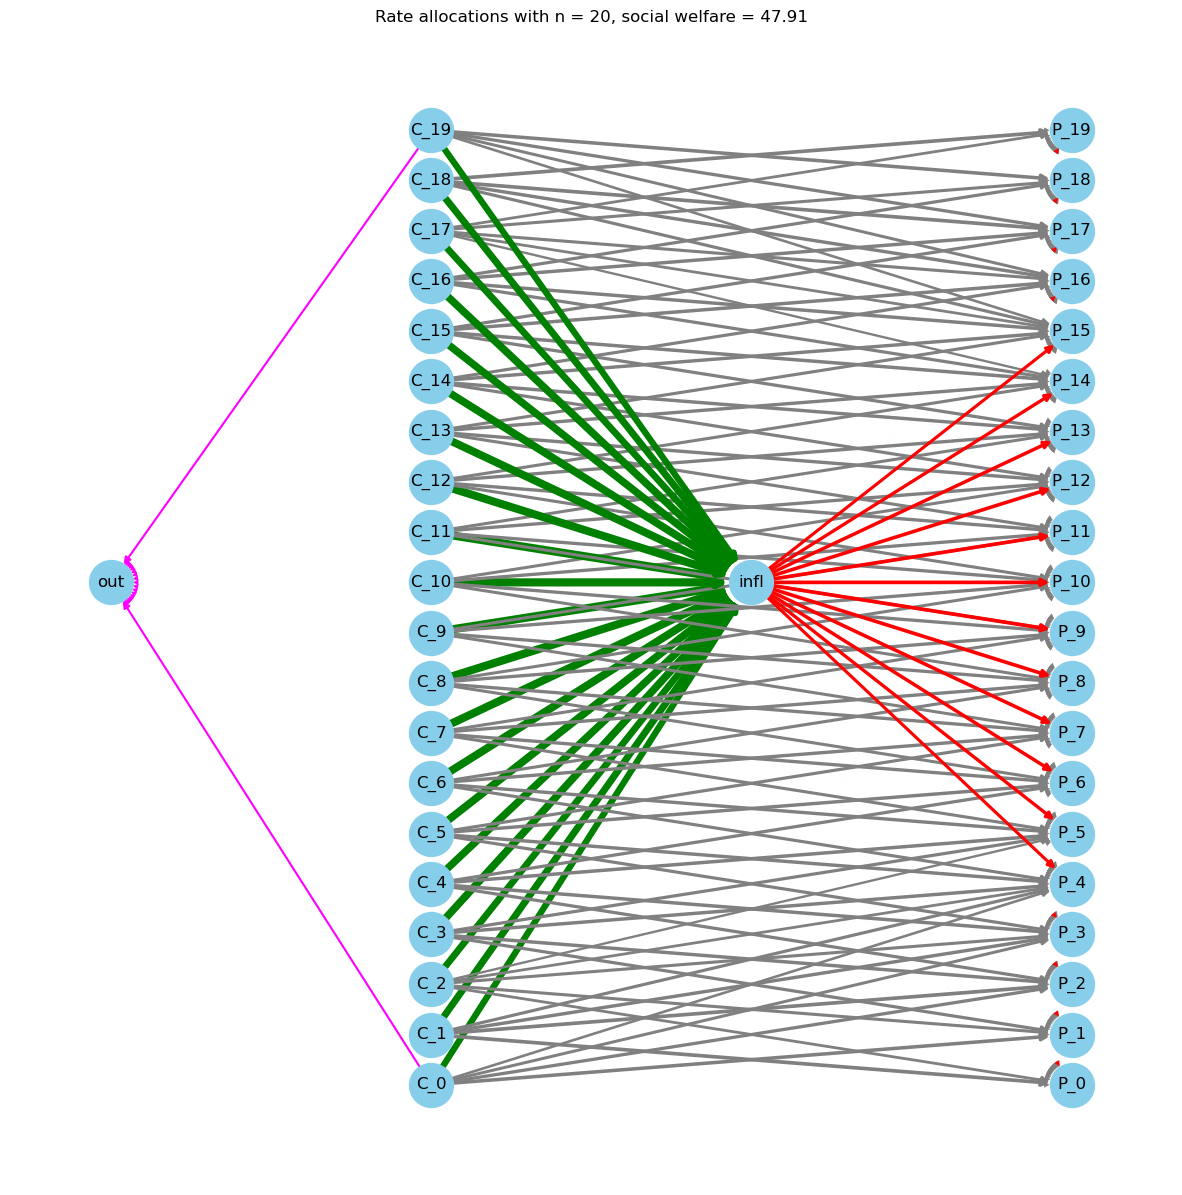

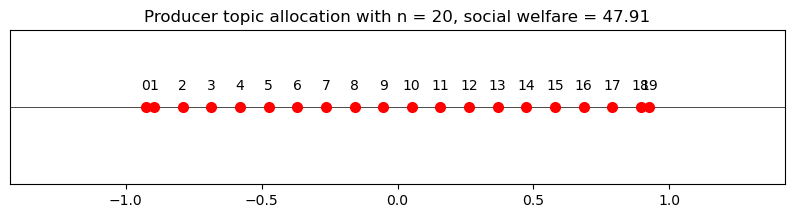

In [4]:
for n in [5, 10, 20]:
    model = run_model(
        num_members=n
    )

    graph_model(model, f'n = {n}', file=f'n/{n}')

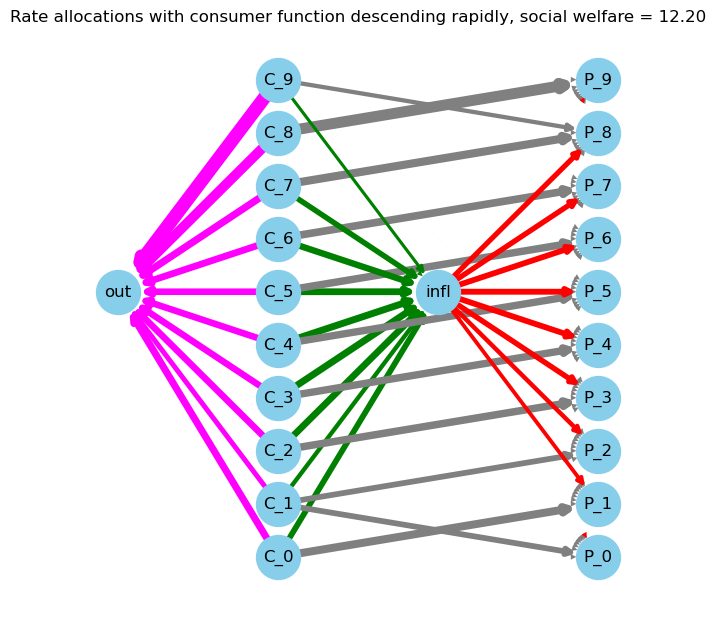

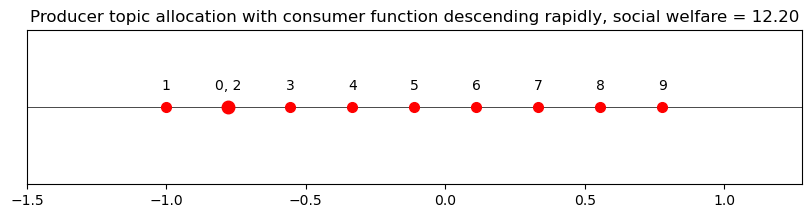

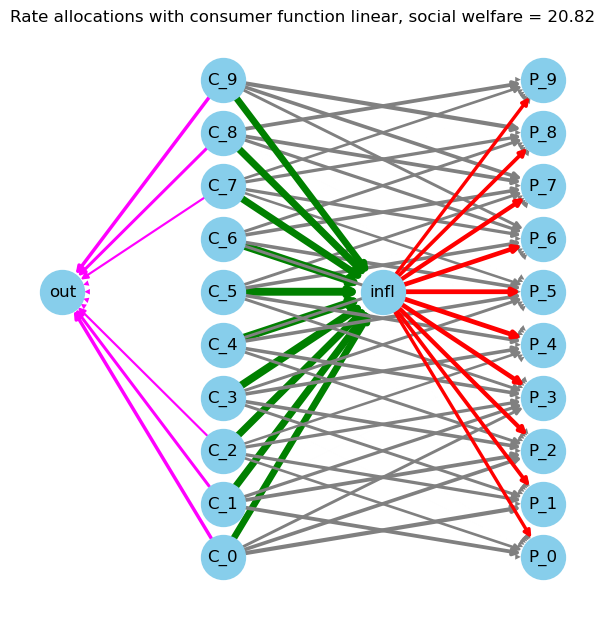

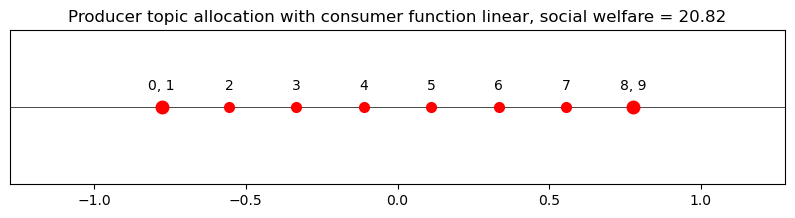

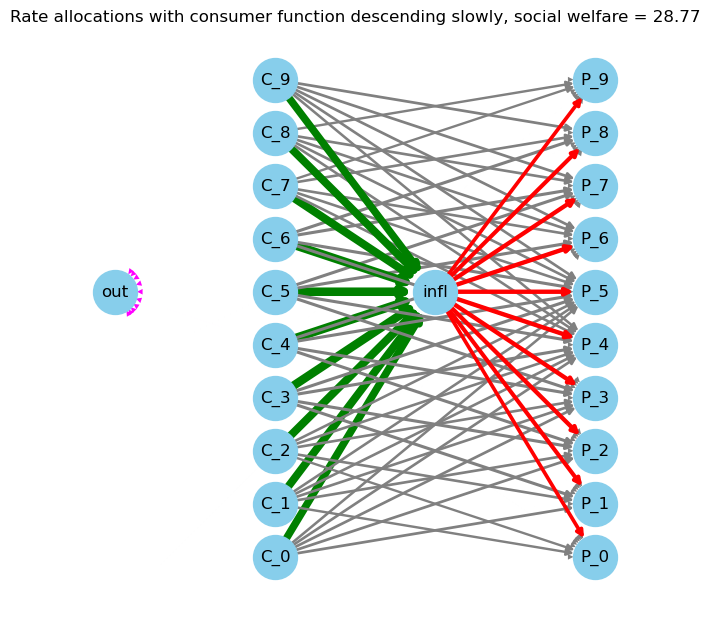

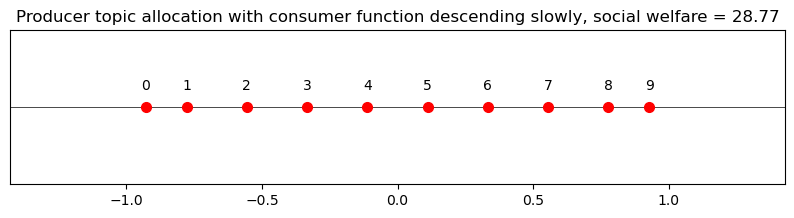

In [5]:
functions = {
    'descending rapidly': (lambda x: np.exp(- 4 * x)),
    'linear': (lambda x: 1 - 0.5 * x),
    'descending slowly': (lambda x: 1 + np.exp(-8) - np.exp(4 * x - 8)),
}

for f in functions:
    model = run_model(
        f=functions[f],
    )

    graph_model(model, f"consumer function {f}", f"f/{f}")

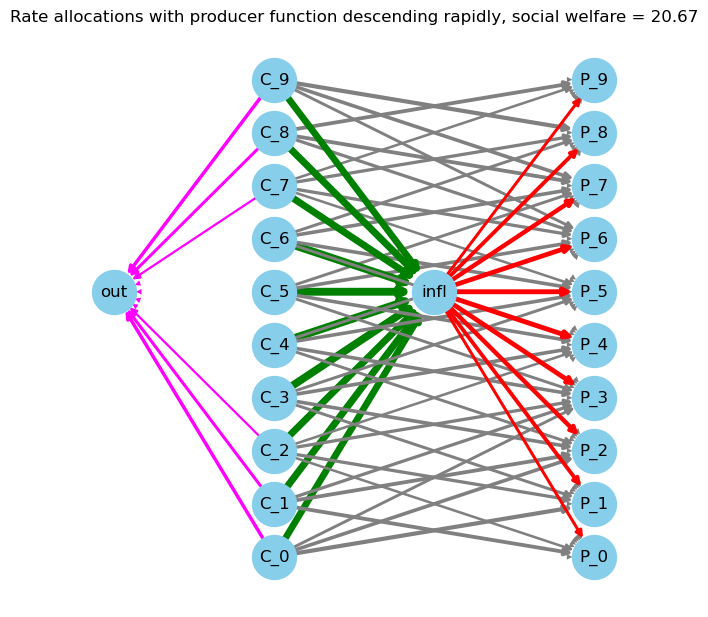

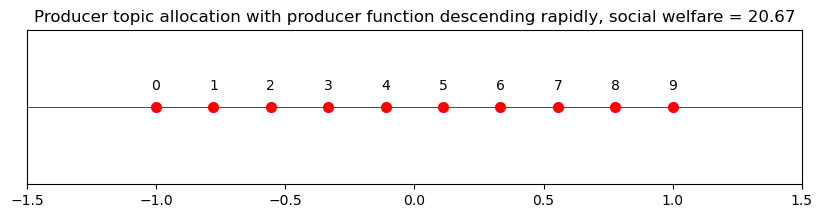

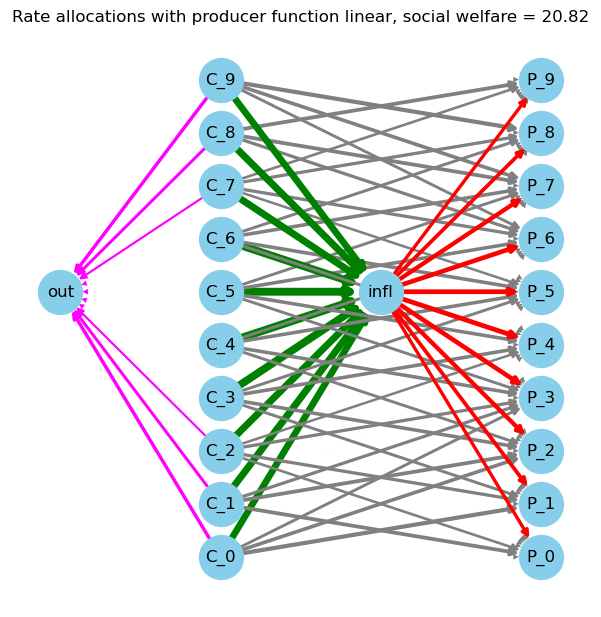

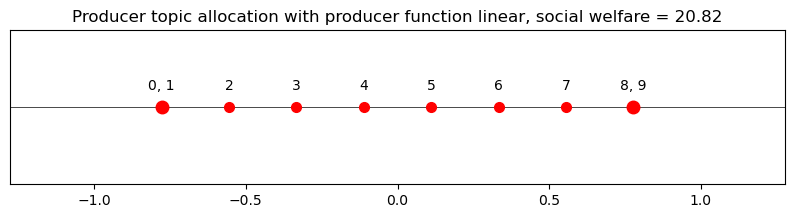

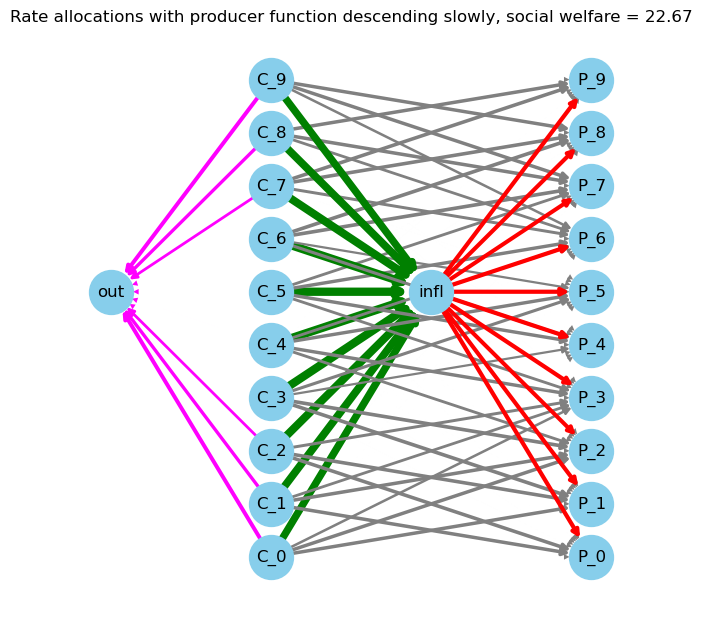

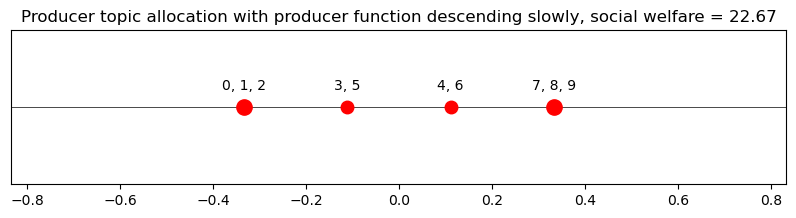

In [6]:
functions = {
    'descending rapidly': (lambda x: np.exp(- 4 * x)),
    'linear': (lambda x: 1 - 0.5 * x),
    'descending slowly': (lambda x: 1 + np.exp(-8) - np.exp(4 * x - 8)),
}

for f in functions:
    model = run_model(
        g=functions[f],
    )

    graph_model(model, f"producer function {f}", f"g/{f}")

Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation


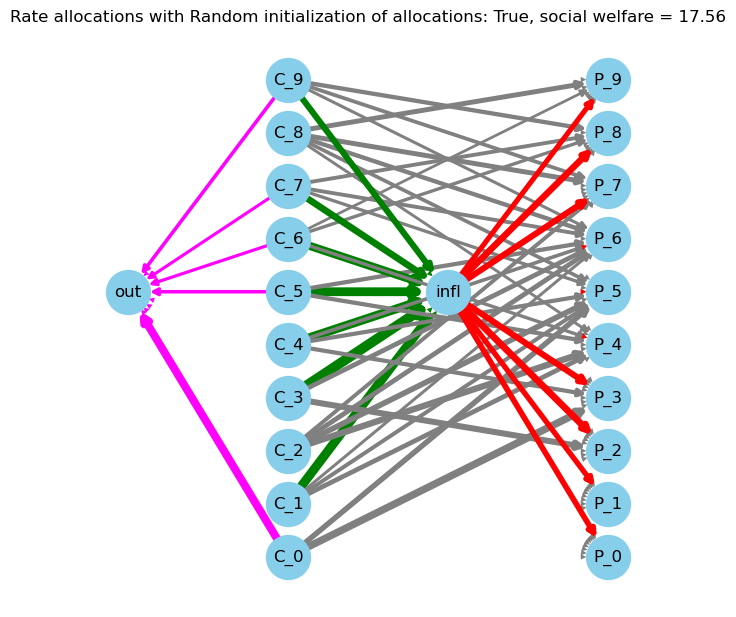

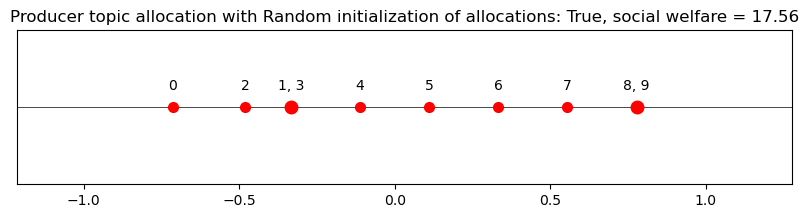

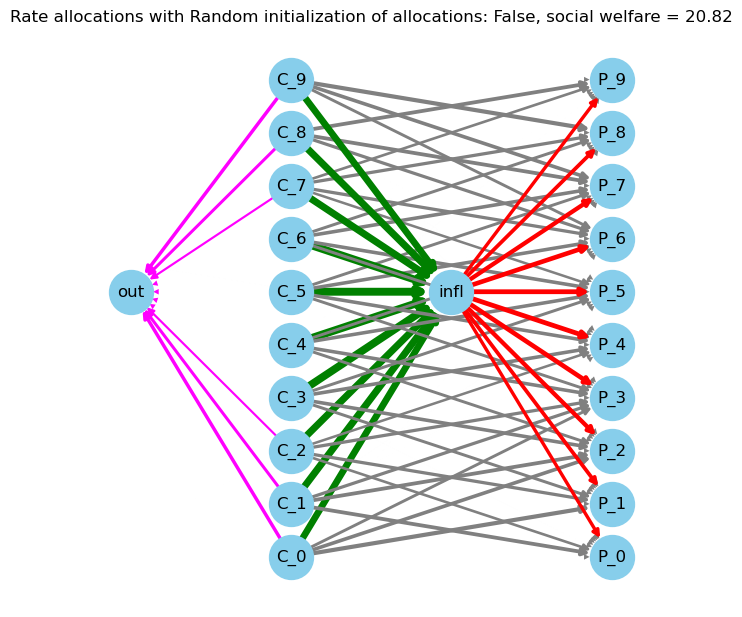

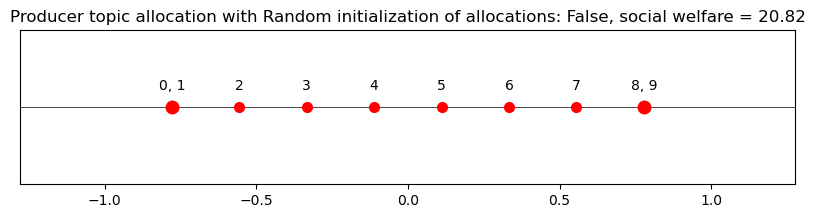

In [7]:
for r in [True, False]:
    model = run_model(
        is_random_init=r,
    )

    graph_model(model, f"Random initialization of allocations: {r}", f"rand/{r}")

Did not converge!


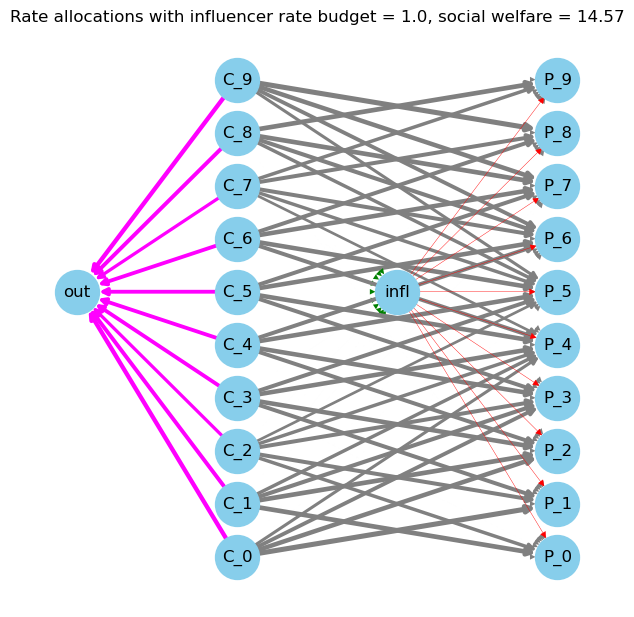

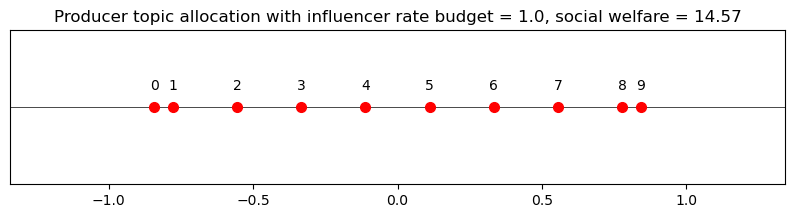

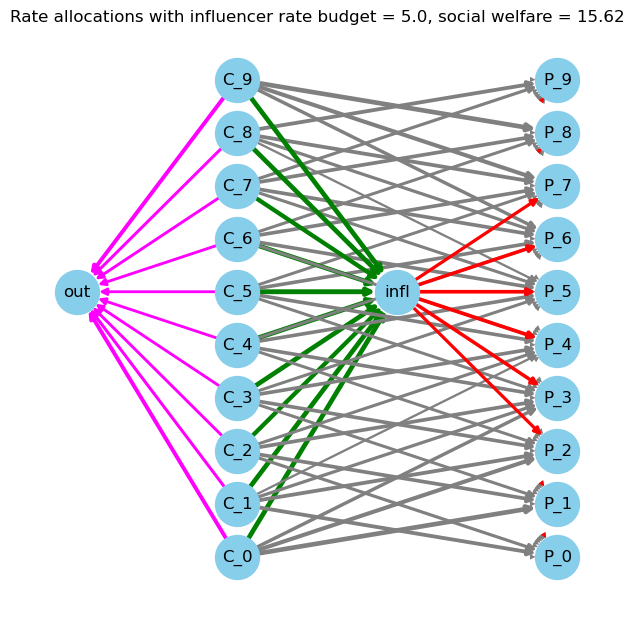

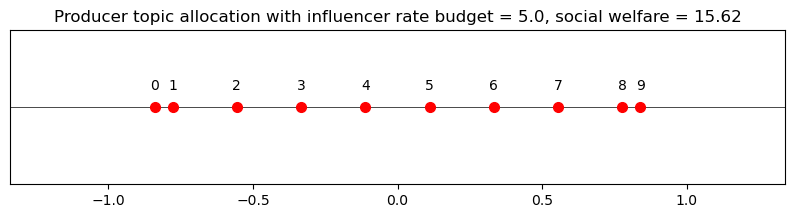

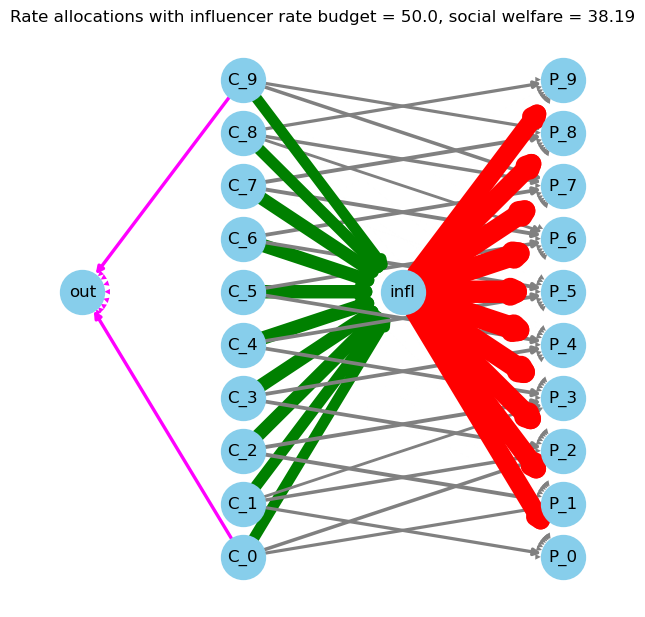

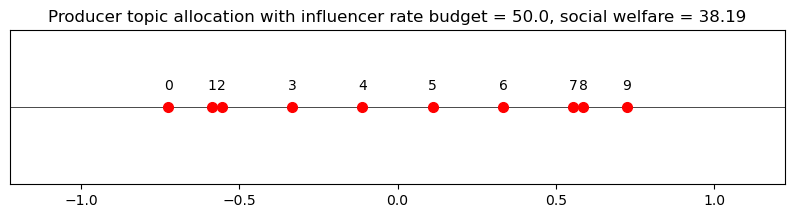

In [8]:
for m in [1.0, 5.0, 50.0]:
    model = run_model(
        M_INFL=m,
    )

    graph_model(model, f"influencer rate budget = {m}", f"M_INFL/{m}")

Did not converge!


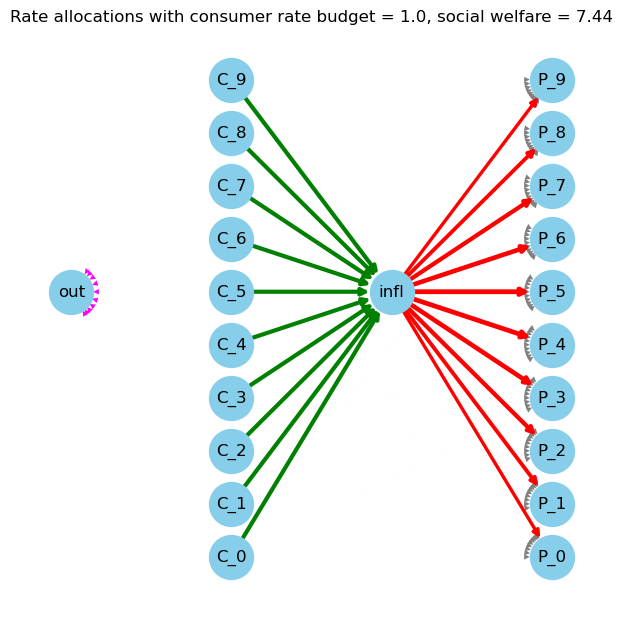

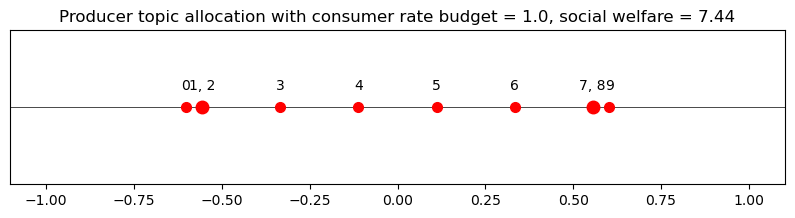

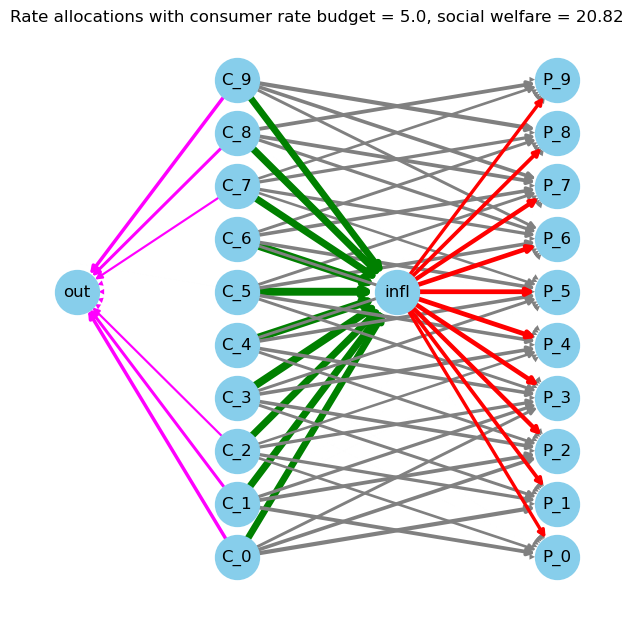

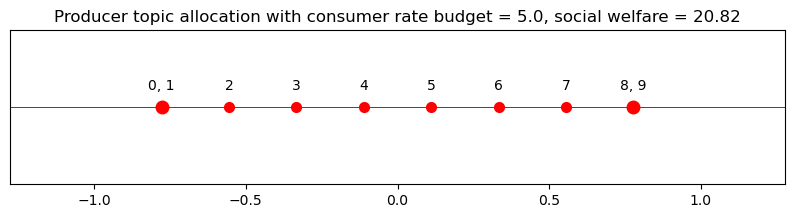

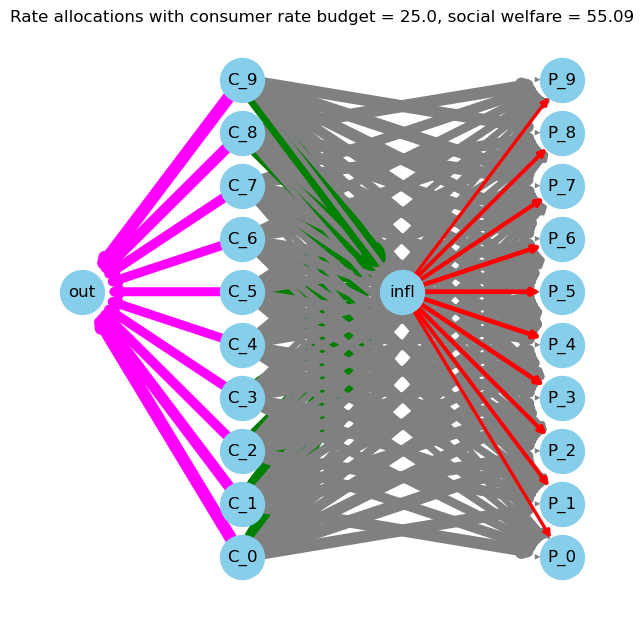

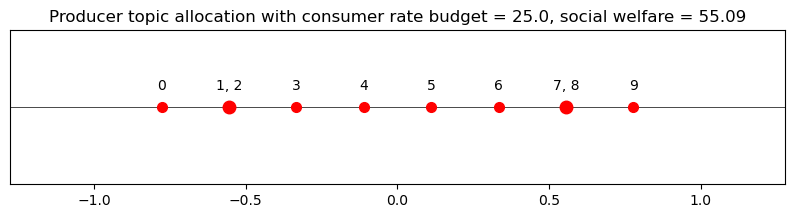

In [9]:
for m in [1.0, 5.0, 25.0]:
    model = run_model(
        M=m,
    )

    graph_model(model, f"consumer rate budget = {m}", f"M/{m}")

Did not converge!


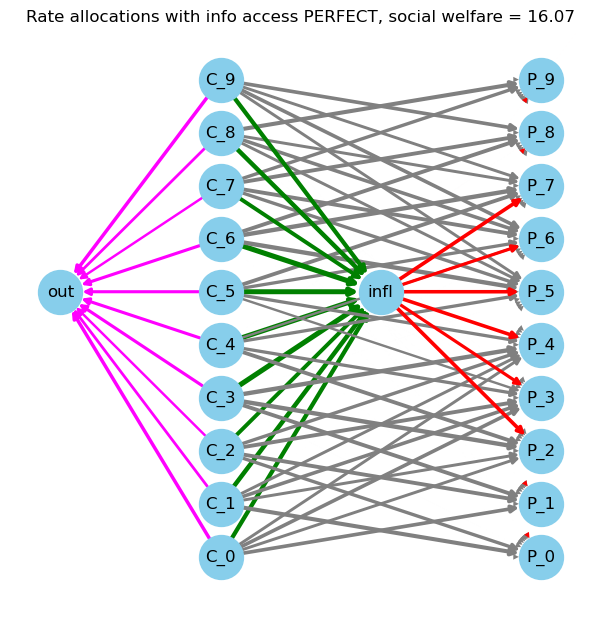

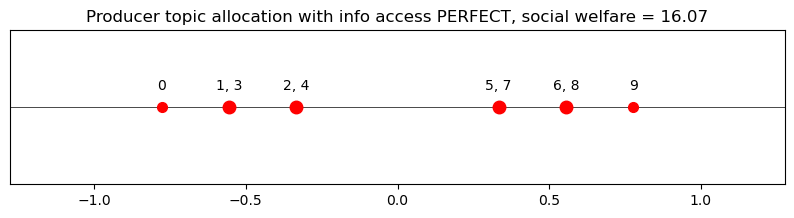

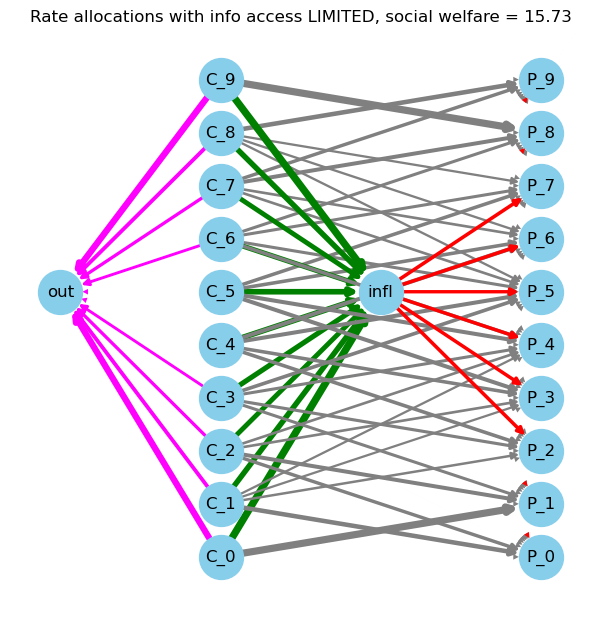

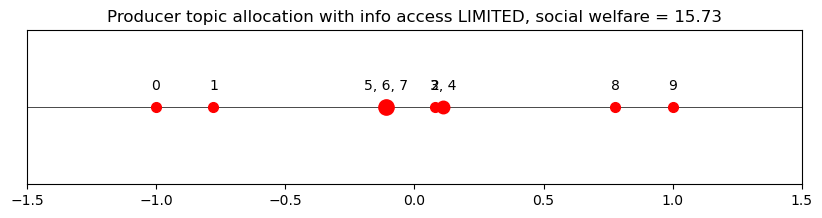

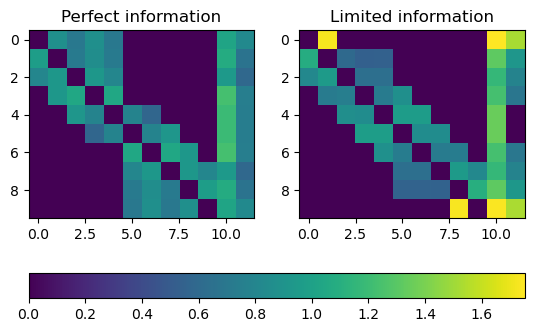

In [10]:
models = {}

for t in [InfoAccessEnum.PERFECT, InfoAccessEnum.LIMITED]:
    model = run_model(
        info_access=t,
        M_INFL=5,
        g=(lambda x: 1 + np.exp(-8) - np.exp(4 * x - 8)),
    )
    models[t] = model

    graph_model(model, f"info access {InfoAccessEnum(t).name}", f"lim/{t}")

vmax = max(models[InfoAccessEnum.PERFECT].mems_alloc.max(), models[InfoAccessEnum.LIMITED].mems_alloc.max())

fig, (ax1, ax2) = plt.subplots(1, 2)
cax1 = ax1.imshow(models[InfoAccessEnum.PERFECT].mems_alloc, vmin=0, vmax=vmax, cmap='viridis', interpolation='none')
ax1.set_title("Perfect information")
cax2 = ax2.imshow(models[InfoAccessEnum.LIMITED].mems_alloc, vmin=0, vmax=vmax, cmap='viridis', interpolation='none')
ax2.set_title("Limited information")

fig.colorbar(cax2, ax=[ax1, ax2], orientation='horizontal')  # Show a colorbar to map color intensity to the data value
plt.savefig('paper/figures/lim/colormap.jpg')
plt.show()